In [1]:
import numpy as np
from numpy import linalg as LA
from random import randrange as rg

ГЕНЕРАЦИЯ ИСХОДНЫХ ДАННЫХ

In [ ]:
def create_main_matrix(N, data_type = "float"):
    data = np.random.rand(N, N+1) * 100
    if data_type == "int":
        data = np.random.randint(1, 110, size = (N, N+1))
    main_matrix = data[:, :N]
    y = data[:,-1].reshape(N, 1)
    return data, y, main_matrix
try:
    main_matrix_y, y, main_matrix = create_main_matrix(int(input("Введите кол-во отраслей: ")), input("Введите int, если хотите импользовать целые числа! "))
    print(y)
except ValueError:
    print("Ошибка ввода!")
except KeyboardInterrupt:
    print("Прервано пользователем")

#### Матрица потребителей

In [ ]:
main_matrix

#### Матрица потребителей с конечным потреблением

In [4]:
main_matrix_y

array([[24.57576436, 18.71330779, 89.48408311,  7.5360091 ],
       [81.77664468, 72.10524809, 81.92139755, 42.39340711],
       [92.12758575, 37.94990983, 81.20666188, 63.97064225]])

#### Увеличение конечного потребления 

In [5]:
def create_double_y(y, choices, k):
    choices = list(set(choices)) 
    for i in range(len(choices)):
        if choices[i] >= len(y):
            print("Неправильные входные данные")
            return
    y_temp = np.copy(y)
    for i in range(len(choices)):
        y_temp[choices[i]] = y_temp[choices[i]] * k
    return y_temp

In [6]:
# choices = [2, 1] #список того, какие отрасли увеличить конечное потребление в 2 раза
# k = 2 #коэффициент того, во сколько раз изменился y для отраслей
try:
    k = float(input("Введите коэффициент: "))
    choices = input("Введите через ПРОБЕЛ номера отраслей: ")
    choices = list(map(int, choices.split(" ")))
    y2 = create_double_y(y, choices, k)
    print(y2)
except ValueError:
    print("Ошибка ввода!")
except KeyboardInterrupt:
    print("Прервано пользователем")

Введите коэффициент: 2
Введите через ПРОБЕЛ номера отраслей: 2 1
[[  7.5360091 ]
 [ 84.78681422]
 [127.94128451]]


#### Получение валового продукта

In [7]:
#валовый продукт X
def create_x(main_matrix):
    x = np.array([0.] * len(main_matrix)).reshape(len(main_matrix), 1)
    for i in range(len(main_matrix)):
#         print(main_matrix[i])
        x[i] = sum(main_matrix[i])
    return x

x = create_x(main_matrix_y)
x

array([[140.30916436],
       [278.19669743],
       [275.25479971]])

Тестовые данные из варианта 13 для тестирования моих функций (именно для моего варианта)

In [8]:

main_matrix_t = np.array([[13, 35], [24, 30]]) #главная матрица - про потребление

y_t = np.array([[100, 160]]).reshape(2, 1) #конечноe потребление y
x_t = np.array([[148, 214]]).reshape(2, 1) #объем производства x

y2_t = np.array([[200, 160]]).reshape(2, 1) #конечное потребление *2 для 1 отрасли

### Основные функции

#### Матрица прямых затрат

In [9]:
def create_direct_costs_matrix(main_matrix, x):
    
    A = np.array([[0.] * len(main_matrix)] * len(main_matrix)) #матрица прямых затрат
    for i in range(len(main_matrix)):
        for j in range(len(main_matrix)):
            A[j][i] = main_matrix[j][i] / x[i]
    return A
A = create_direct_costs_matrix(main_matrix, x)
A

array([[0.17515438, 0.06726646, 0.32509545],
       [0.58283181, 0.25918801, 0.29762023],
       [0.65660419, 0.13641395, 0.2950236 ]])

#### Матрица полных затрат

In [10]:
def create_total_costs_matrix(A):
    E = np.eye(len(A)) #единичная матрица 2 на 2
    
    EA = E - A # Построение матрицы (E-A)
    S = LA.inv(EA) #матрица полных затрат
    return S


S = create_total_costs_matrix(A)
S

array([[2.79176128, 0.53190857, 1.51195933],
       [3.51423157, 2.13321236, 2.52114518],
       [3.28021246, 0.90819114, 3.31454812]])

#### Cобственные вектора матрицы А

In [11]:
def create_eigen_values_matrix(A):
    wa, va = LA.eig(A)
    return wa, va #wa - собственные числа, va - собственные вектора матрицы А
 
wa, va = create_eigen_values_matrix(A)
va

array([[-0.37250319, -0.62854889,  0.15462525],
       [-0.69028216,  0.32058316, -0.9728583 ],
       [-0.62028373,  0.70862736,  0.17215618]])

#### Собственные числа матрицы A

In [12]:
wa

array([ 0.84114669, -0.22566731,  0.1138866 ])

#### Число Фробениуса

In [13]:
def create_Frobenius_number(wa):
    return max(wa).real

frob = create_Frobenius_number(wa)
frob

0.8411466906929831

#### Новый вектор объемов производства(валового выпуска)

In [14]:
def create_new_X(S, y2):
    x2 = S.dot(y2)
    return x2

x2 = create_new_X(S, y2) #Вектор новых объемов производства по отраслям, → (валового выпуска)
x2

array([[259.57959028],
       [529.91011377],
       [525.7898885 ]])

#### Вектор чистой продукции отраслей xc

In [15]:
def create_clear_prod(A, x2):
    xc = np.array([0.] * len(A)).reshape(len(A), 1)
    for i in range(len(A)):
        for j in range(len(A) - 1):
            xc[i] = x2[i] - (A[j][i] * x2[i] + A[j + 1][i] * x2[i])
    return xc

xc_c = create_clear_prod(A, x2)
xc_c

array([[-62.15270062],
       [320.27663576],
       [214.18375386]])

#### Функции для определения, продуктивна ли матрица


In [16]:
def is_productiv_total_costs(S):
    if len(S[S<0]) == 0:
        return True
    else:
        return False

In [17]:
def is_productiv_Frob(Frob):
    return True if Frob < 1 else False

#### Общий итог

In [18]:
#Ответ
print("Матрица прямых затрат = ", A)
print("\nМатрица полных затрат = ", S)
print("\nМатрица продуктивна = ", is_productiv_total_costs(S))
print("\nМатрица продуктивна (по числу Фробениуса) = ", is_productiv_Frob(frob))
print("\nЧисло Фробениуса = ", frob)
print("\nВектор Фробениуса = ", va)
print(f"\nУвеличенное в {k} раз(а) конечное потребление = ", y2.reshape(1,len(y2)))
print("\nНовый вектор объемов производства (валового выпуска) = ", x2.reshape(1,len(x2)))
print("\nВектор чистой продукции отраслей xc = ", xc_c.reshape(1,len(xc_c)))

Матрица прямых затрат =  [[0.17515438 0.06726646 0.32509545]
 [0.58283181 0.25918801 0.29762023]
 [0.65660419 0.13641395 0.2950236 ]]

Матрица полных затрат =  [[2.79176128 0.53190857 1.51195933]
 [3.51423157 2.13321236 2.52114518]
 [3.28021246 0.90819114 3.31454812]]

Матрица продуктивна =  True

Матрица продуктивна (по числу Фробениуса) =  True

Число Фробениуса =  0.8411466906929831

Вектор Фробениуса =  [[-0.37250319 -0.62854889  0.15462525]
 [-0.69028216  0.32058316 -0.9728583 ]
 [-0.62028373  0.70862736  0.17215618]]

Увеличенное в 2.0 раз(а) конечное потребление =  [[  7.5360091   84.78681422 127.94128451]]

Новый вектор объемов производства (валового выпуска) =  [[259.57959028 529.91011377 525.7898885 ]]

Вектор чистой продукции отраслей xc =  [[-62.15270062 320.27663576 214.18375386]]


### Проверка матрицы на продуктивность

#### Проверка по матрице полных затрат(неотрицательность каждого элемента)

In [19]:
otvet = is_productiv_total_costs(S)
if otvet == True:
    print("Матрица продуктивна! ")
else:
    print("Матрица не продуктивна! ")

Матрица продуктивна! 


In [20]:
otvet = is_productiv_Frob(frob)
if otvet == True:
    print("Матрица продуктивна! ")
else:
    print("Матрица не продуктивна! ")

Матрица продуктивна! 


### График



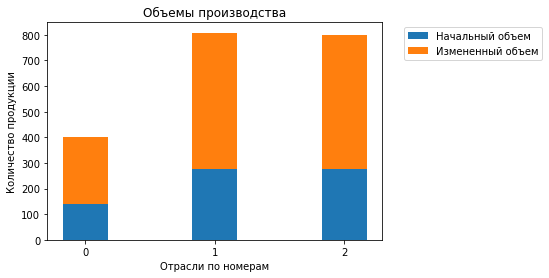

In [25]:
import matplotlib.pyplot as plt
labels = [*range(len(main_matrix))]
width = 0.35      
fig, ax = plt.subplots()

x_for_graph = x.reshape(1, len(x))[0]
x2_for_graph = x2.reshape(1, len(x2))[0]
ax.bar(labels, x_for_graph, width,  label='Начальный объем')
ax.bar(labels, x2_for_graph, width, bottom=x_for_graph,
       label='Измененный объем')

ax.set_ylabel('Количество продукции')
ax.set_title('Объемы производства')
ax.set_xticks(labels)
ax.set_xlabel('Отрасли по номерам')

ax.legend(bbox_to_anchor=(1.05, 1.),
                         loc='upper left')

plt.show()